# **EVALUATION of Project Student Arthur Ryan Student # 20170386 - NCI**

**Background - exploration of data**

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


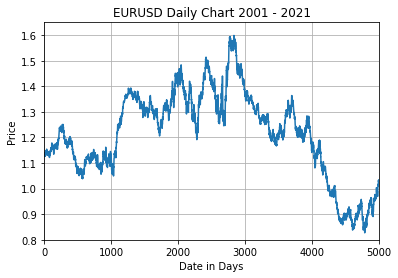

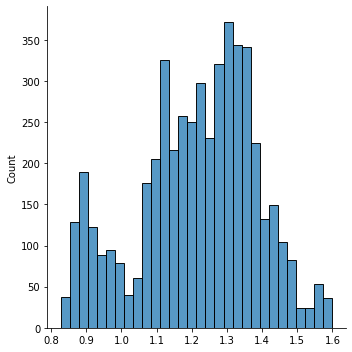

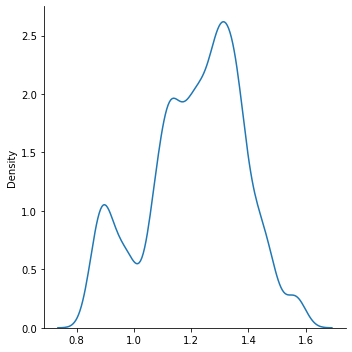

In [ ]:
# EVALUATION code - 1st block
# Arthur Ryan 20170386
# NCI AIML Course 2020-21
# Project Module - FOrexcaster Application


# Background - Plotting times series

%matplotlib inline

from google.colab import drive

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import math
from sympy import symbols, Eq, solve
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas_datareader.data as web
# from pyfinance.ols import PandasRollingOLS
import os, sys
from pathlib import Path

import numpy as np
from scipy.stats import spearmanr
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, _tree
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error, make_scorer
import graphviz
# $pip install graphviz

import statsmodels.api as sm
import os
import pathlib
import sys
import typing
import timeit

from google.colab import drive
drive.mount('/content/drive/')

ccyorgnl = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/*Capstone Course Project/EUR_USD_Daily_Historical_Data.csv')

X = ccyorgnl['date_month'].iloc[:].values
y = ccyorgnl['closebid'].iloc[:].values

# plotting historic data
plt.plot(y)
plt.title('EURUSD Daily Chart 2001 - 2021')
plt.xlabel('Date in Days')
plt.ylabel('Price')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([0,5000, 0.80, 1.65])
plt.grid(True)
plt.show()

# table of statistical value analysis
ccyorgnl.describe()

# distribution graph plot
#penguins = sns.load_dataset("penguins")
#sns.displot(penguins, x="flipper_length_mm")

#sns.displot of "Daily EURUSD price (2000-2021)"
sns.displot(ccyorgnl, x=y)

#sns.displot of "Daily EURUSD price (2000-2021)"
sns.displot(ccyorgnl, x=y, kind="kde")

# **Regressions**

Regression - Monthly - 9 month lag

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).

Pre lagged operation




Post lagged operation


                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          3.024e+05
Date:                Fri, 20 Aug 2021   Prob (F-statistic):                        0.00
Time:                        17:18:27   Log-Likelihood:                          480.78
No. Observations:                 248   AIC:                                     -959.6
Df Residuals:                     247   BIC:                                     -956.0
Df Model:                           1                                                  
Covariance Type:           

const          0.020716
Lag_1_month    1.007547
Lag_2_month   -0.014950
Lag_3_month    0.082618
Lag_4_month   -0.111298
Lag_5_month    0.012416
Lag_6_month    0.103673
Lag_7_month   -0.241743
Lag_8_month    0.107755
Lag_9_month    0.036151
dtype: float64

<Figure size 432x288 with 0 Axes>

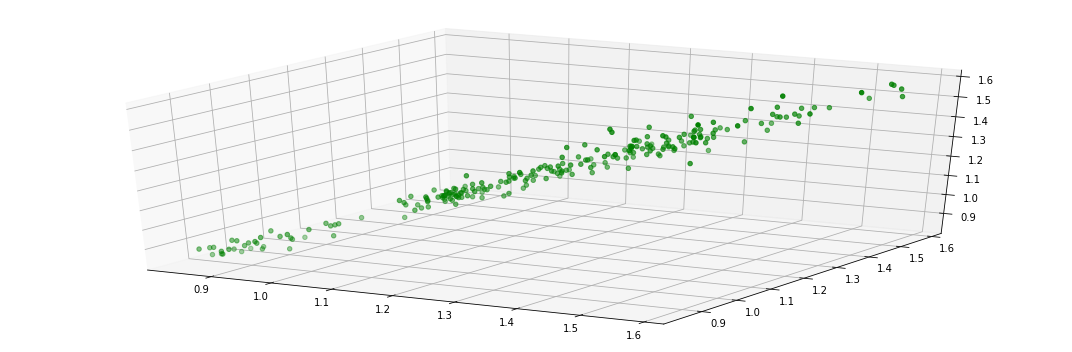

In [ ]:
# EVALUATION code - 2nd block
# Arthur Ryan 20170386
# NCI AIML Course 2020-21
# Project Module - FOrexcaster Application

# Capstone Project 
# -> MONTHLY Time Basis

%matplotlib inline

from google.colab import drive
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import math
from sympy import symbols, Eq, solve
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas_datareader.data as web
# from pyfinance.ols import PandasRollingOLS
import os, sys
from pathlib import Path

import numpy as np
from scipy.stats import spearmanr
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, _tree
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error, make_scorer
import graphviz
# $pip install graphviz

import statsmodels.api as sm
import os
import pathlib
import sys
import typing
import timeit

from google.colab import drive
drive.mount('/content/drive/')

ccyorgnl = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/*Capstone Course Project/EUR_USD_Monthly_Historical_Data.csv')

ccyorgnl.info

ccylagged = pd.DataFrame()

ccylagged['frame'] = ccyorgnl['frame'].iloc[:260].values
ccylagged['date'] = ccyorgnl['date_month'].iloc[:260].values
ccylagged['symbol'] = ccyorgnl['symbol'].iloc[:260].values
ccylagged['closebid'] = ccyorgnl['closebid'].iloc[:260].values

print("\nPre lagged operation\n")

# creation of lagged features/columns
for t in range (1,13): # 3024 is 3 months of hourly data/ ie 3024 hours back from t zero is the hours 3 months ago at 21 trading days a motnhs times 6 months
  ccylagged[f'return_D0_t-{t}'] = ccylagged.closebid.shift(t)

print()
print()

ccylagged = ccylagged.dropna()

pd.set_option('display.max_columns', None)
print("\nPost lagged operation\n")

print()

y = ccylagged['closebid'].iloc[:260].where(ccylagged['symbol'] == 'EUR/USD')

X_date = ccylagged['date'].iloc[:260].where(ccylagged['symbol'] == 'EUR/USD')

X_lagged_9 = ccylagged.loc[:,['return_D0_t-1','return_D0_t-2','return_D0_t-3','return_D0_t-4','return_D0_t-5','return_D0_t-6','return_D0_t-7','return_D0_t-8','return_D0_t-9','return_D0_t-10','return_D0_t-11','return_D0_t-12']].where(ccylagged['symbol'] == 'EUR/USD')

X_lagged = ccylagged['return_D0_t-1'].iloc[:260].where(ccylagged['symbol'] == 'EUR/USD')
X1 = ccylagged['symbol'].iloc[:260].where(ccylagged['symbol'] == 'EUR/USD')

data = pd.DataFrame({'X_date': X_date, 'Y': y, 'X_lagged': X_lagged})

sns.despine()
plt.tight_layout()

# Simple Regression
X = sm.add_constant(data['X_lagged'])
model = sm.OLS(data['Y'], X_lagged).fit()
print(model.summary())

# verify calculation
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
pd.Series(beta, index=X.columns)

# display and model residuals <- WORKS just removed for speed
#data['y-hat'] = model.predict()
#data['residuals'] = model.resid
#ax = data.plot.scatter(x='X_lagged', y='Y', c='darkgrey', figsize=(14,6))
#data.plot.line(x='X_lagged', y='y-hat', ax=ax);
#for _, row in data.iterrows():
    #plt.plot((row.X_lagged, row.X_lagged), (row.Y, row['y-hat']), 'k-')    
#sns.despine()
#plt.tight_layout();


# Mulitple Regression
# Mulitple Regression
# Mulitple Regression


## Create data
X_1, X_2 = ccylagged['return_D0_t-1'].iloc[:260].where(ccylagged['symbol'] == 'EUR/USD'), ccylagged['return_D0_t-2'].iloc[:260].where(ccylagged['symbol'] == 'EUR/USD')
X_3, X_4 = ccylagged['return_D0_t-3'].iloc[:260].where(ccylagged['symbol'] == 'EUR/USD'), ccylagged['return_D0_t-4'].iloc[:260].where(ccylagged['symbol'] == 'EUR/USD')
X_5, X_6 = ccylagged['return_D0_t-5'].iloc[:260].where(ccylagged['symbol'] == 'EUR/USD'), ccylagged['return_D0_t-6'].iloc[:260].where(ccylagged['symbol'] == 'EUR/USD')
X_7, X_8 = ccylagged['return_D0_t-7'].iloc[:260].where(ccylagged['symbol'] == 'EUR/USD'), ccylagged['return_D0_t-8'].iloc[:260].where(ccylagged['symbol'] == 'EUR/USD')
X_9 = ccylagged['return_D0_t-9'].iloc[:260].where(ccylagged['symbol'] == 'EUR/USD')

data = pd.DataFrame({'Lag_1_month': X_1, 'Lag_2_month': X_2, 'Lag_3_month': X_3, 'Lag_4_month': X_4, 'Lag_5_month': X_5, 'Lag_6_month': X_6, 'Lag_7_month': X_7, 'Lag_8_month': X_8, 'Lag_9_month': X_9})
data['Y'] = y

# Plot
three_dee = plt.figure(figsize=(15, 5)).gca(projection='3d')
three_dee.scatter(data.Lag_1_month, data.Lag_2_month, data.Y, c='g')
sns.despine()
plt.tight_layout();

X = data[['Lag_1_month', 'Lag_2_month', 'Lag_3_month', 'Lag_4_month', 'Lag_5_month', 'Lag_6_month', 'Lag_7_month', 'Lag_8_month', 'Lag_9_month']]
y = data['Y']

X_ols = sm.add_constant(X)
model = sm.OLS(y, X_ols).fit()
print(model.summary())

# verify computation
beta = np.linalg.inv(X_ols.T.dot(X_ols)).dot(X_ols.T.dot(y))
pd.Series(beta, index=X_ols.columns)

# save output as image
#plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model_summary), {'fontsize': 14}, fontproperties = 'monospace')
#plt.axis('off')
#plt.tight_layout()
#plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.1)
# plt.savefig('figures/multiple_regression_summary.png', bbox_inches='tight', dpi=300);

# display model and residuals
#three_dee = plt.figure(figsize=(15, 5)).gca(projection='3d')
#three_dee.scatter(data.Lag_1_hour, data.Lag_2_hour, data.Y, c='g')
#data['y-hat'] = model.predict()
# to_plot = data.set_index(['Lag_1_hour', 'Lag_2_hour']).unstack().loc[:, 'y-hat']
#to_plot = data.set_index(['Lag_1_hour']).unstack().loc[:, 'y-hat'] # <- does not work
#three_dee.plot_surface(Lag_1_hour, Lag_2_hour, to_plot.values, color='black', alpha=0.2, linewidth=1, antialiased=True)
#for _, row in data.iterrows():
#    plt.plot((row.Lag_1_hour, row.Lag_1_hour), (row.Lag_2_hour, row.Lag_2_hour), (row.Y, row['y-hat']), 'k-');
#three_dee.set_xlabel('$X_1$');three_dee.set_ylabel('$X_2$');three_dee.set_zlabel('$Y, \hat{Y}$')
#sns.despine()
#plt.tight_layout();

# **Regression - Daily - 9 day lag**

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).

Pre lagged operation




Post lagged operation


                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.321e+07
Date:                Fri, 20 Aug 2021   Prob (F-statistic):                        0.00
Time:                        17:22:24   Log-Likelihood:                          959.67
No. Observations:                 248   AIC:                                     -1917.
Df Residuals:                     247   BIC:                                     -1914.
Df Model:                           1                                                  
Covariance Type:           

const        0.000038
Lag_1_day    0.891360
Lag_2_day    0.050502
Lag_3_day    0.053446
Lag_4_day   -0.040263
Lag_5_day    0.071401
Lag_6_day   -0.059692
Lag_7_day   -0.057437
Lag_8_day    0.017593
Lag_9_day    0.073554
dtype: float64

<Figure size 432x288 with 0 Axes>

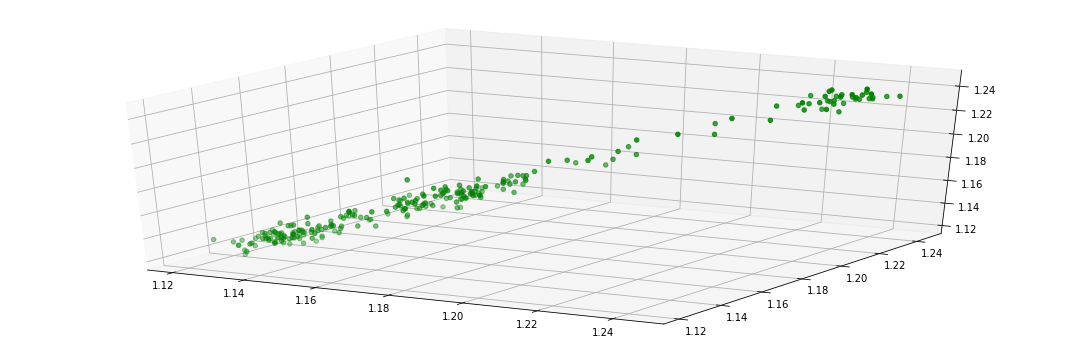

In [ ]:
# EVALUATION code - 3rd block
# Arthur Ryan 20170386
# NCI AIML Course 2020-21
# Project Module - FOrexcaster Application

# Capstone Project

# - WORKS - 9 day lags - for 9 lagged periods DAILY - Regression Method - to 12/8/2021
# -> DAILY Time Basis

def DAILY_9lag_forecaster():

  %matplotlib inline

from google.colab import drive

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import math
from sympy import symbols, Eq, solve
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas_datareader.data as web
# from pyfinance.ols import PandasRollingOLS
import os, sys
from pathlib import Path
import numpy as np
from scipy.stats import spearmanr
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, _tree
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error, make_scorer
import graphviz
import statsmodels.api as sm
import os
import pathlib
import sys
import typing
import timeit
from google.colab import drive

drive.mount('/content/drive/')

ccyorgnl = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/*Capstone Course Project/EUR_USD_Daily_Historical_Data.csv')

ccyorgnl.info

ccylagged = pd.DataFrame()

ccylagged['date'] = ccyorgnl['date_month'].iloc[:260].values
ccylagged['symbol'] = ccyorgnl['symbol'].iloc[:260].values
ccylagged['closebid'] = ccyorgnl['closebid'].iloc[:260].values

print("\nPre lagged operation\n")

# creation of lagged features/columns
for t in range (1,13): # 3024 is 3 months of hourly data/ ie 3024 hours back from t zero is the hours 3 months ago at 21 trading days a motnhs times 6 months
    ccylagged[f'return_D0_t-{t}'] = ccylagged.closebid.shift(t)

print()
print()
ccylagged = ccylagged.dropna()
pd.set_option('display.max_columns', None)
print("\nPost lagged operation\n")
print()

y = ccylagged['closebid'].iloc[:260].where(ccylagged['symbol'] == 'EUR/USD')

X_date = ccylagged['date'].iloc[:260].where(ccylagged['symbol'] == 'EUR/USD')

X_lagged_9 = ccylagged.loc[:,['return_D0_t-1','return_D0_t-2','return_D0_t-3','return_D0_t-4','return_D0_t-5','return_D0_t-6','return_D0_t-7','return_D0_t-8','return_D0_t-9','return_D0_t-10','return_D0_t-11','return_D0_t-12']].where(ccylagged['symbol'] == 'EUR/USD')

X_lagged = ccylagged['return_D0_t-1'].iloc[:260].where(ccylagged['symbol'] == 'EUR/USD')
X1 = ccylagged['symbol'].iloc[:260].where(ccylagged['symbol'] == 'EUR/USD')

# clean the data

# plot initial data - Price against Time
data = pd.DataFrame({'X_date': X_date, 'Y': y, 'X_lagged': X_lagged})
sns.despine()
plt.tight_layout()

# Simple Regression
X = sm.add_constant(data['X_lagged'])
model = sm.OLS(data['Y'], X_lagged).fit()
print(model.summary())

# verify calculation
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
pd.Series(beta, index=X.columns)

# display and model residuals <- WORKS just removed for speed
#data['y-hat'] = model.predict()
#data['residuals'] = model.resid
#ax = data.plot.scatter(x='X_lagged', y='Y', c='darkgrey', figsize=(14,6))
#data.plot.line(x='X_lagged', y='y-hat', ax=ax);
#for _, row in data.iterrows():
    #plt.plot((row.X_lagged, row.X_lagged), (row.Y, row['y-hat']), 'k-')    
#sns.despine()
#plt.tight_layout();


# Mulitple Regression
# Mulitple Regression
# Mulitple Regression


## Create data
X_1, X_2 = ccylagged['return_D0_t-1'].iloc[:260].where(ccylagged['symbol'] == 'EUR/USD'), ccylagged['return_D0_t-2'].iloc[:260].where(ccylagged['symbol'] == 'EUR/USD')
X_3, X_4 = ccylagged['return_D0_t-3'].iloc[:260].where(ccylagged['symbol'] == 'EUR/USD'), ccylagged['return_D0_t-4'].iloc[:260].where(ccylagged['symbol'] == 'EUR/USD')
X_5, X_6 = ccylagged['return_D0_t-5'].iloc[:260].where(ccylagged['symbol'] == 'EUR/USD'), ccylagged['return_D0_t-6'].iloc[:260].where(ccylagged['symbol'] == 'EUR/USD')
X_7, X_8 = ccylagged['return_D0_t-7'].iloc[:260].where(ccylagged['symbol'] == 'EUR/USD'), ccylagged['return_D0_t-8'].iloc[:260].where(ccylagged['symbol'] == 'EUR/USD')
X_9 = ccylagged['return_D0_t-9'].iloc[:260].where(ccylagged['symbol'] == 'EUR/USD')

data = pd.DataFrame({'Lag_1_day': X_1, 'Lag_2_day': X_2, 'Lag_3_day': X_3, 'Lag_4_day': X_4, 'Lag_5_day': X_5, 'Lag_6_day': X_6, 'Lag_7_day': X_7, 'Lag_8_day': X_8, 'Lag_9_day': X_9})
data['Y'] = y

## Plot
three_dee = plt.figure(figsize=(15, 5)).gca(projection='3d')
three_dee.scatter(data.Lag_1_day, data.Lag_2_day, data.Y, c='g')
sns.despine()
plt.tight_layout();

X = data[['Lag_1_day', 'Lag_2_day', 'Lag_3_day', 'Lag_4_day', 'Lag_5_day', 'Lag_6_day', 'Lag_7_day', 'Lag_8_day', 'Lag_9_day']]
y = data['Y']

X_ols = sm.add_constant(X)
model = sm.OLS(y, X_ols).fit()
print(model.summary())

# verify computation
beta = np.linalg.inv(X_ols.T.dot(X_ols)).dot(X_ols.T.dot(y))
pd.Series(beta, index=X_ols.columns)

# save output as image
#plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model_summary), {'fontsize': 14}, fontproperties = 'monospace')
#plt.axis('off')
#plt.tight_layout()
#plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.1)
# plt.savefig('figures/multiple_regression_summary.png', bbox_inches='tight', dpi=300);

# display model and residuals
#three_dee = plt.figure(figsize=(15, 5)).gca(projection='3d')
#three_dee.scatter(data.Lag_1_hour, data.Lag_2_hour, data.Y, c='g')
#data['y-hat'] = model.predict()
# to_plot = data.set_index(['Lag_1_hour', 'Lag_2_hour']).unstack().loc[:, 'y-hat']
#to_plot = data.set_index(['Lag_1_hour']).unstack().loc[:, 'y-hat'] # <- does not work
#three_dee.plot_surface(Lag_1_hour, Lag_2_hour, to_plot.values, color='black', alpha=0.2, linewidth=1, antialiased=True)
#for _, row in data.iterrows():
#    plt.plot((row.Lag_1_hour, row.Lag_1_hour), (row.Lag_2_hour, row.Lag_2_hour), (row.Y, row['y-hat']), 'k-');
#three_dee.set_xlabel('$X_1$');three_dee.set_ylabel('$X_2$');three_dee.set_zlabel('$Y, \hat{Y}$')
#sns.despine()
#plt.tight_layout();

# **Regression - Daily - 22 day lag**

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).

Pre lagged operation




Post lagged operation


                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.950e+06
Date:                Fri, 20 Aug 2021   Prob (F-statistic):                        0.00
Time:                        17:26:57   Log-Likelihood:                          17265.
No. Observations:                4978   AIC:                                 -3.449e+04
Df Residuals:                    4956   BIC:                                 -3.434e+04
Df Model:                          22                                                  
Covariance Type:           

const         0.001121
Lag_1_day     0.985390
Lag_2_day     0.006460
Lag_3_day    -0.007789
Lag_4_day     0.034802
Lag_5_day    -0.001588
Lag_6_day    -0.021131
Lag_7_day     0.013450
Lag_8_day     0.002649
Lag_9_day    -0.041965
Lag_10_day    0.019384
Lag_11_day    0.017189
Lag_12_day   -0.002606
Lag_13_day    0.013758
Lag_14_day   -0.025850
Lag_15_day    0.027733
Lag_16_day   -0.015642
Lag_17_day    0.012919
Lag_18_day   -0.014692
Lag_19_day    0.007995
Lag_20_day   -0.018958
Lag_21_day   -0.005830
Lag_22_day    0.013383
dtype: float64

<Figure size 432x288 with 0 Axes>

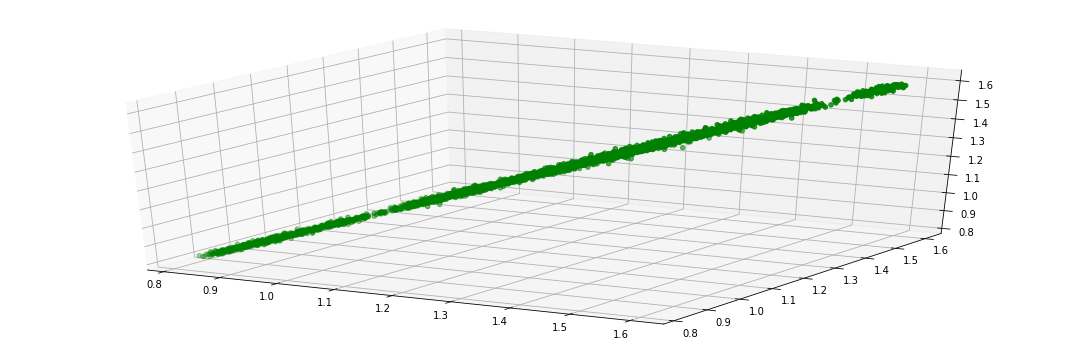

In [ ]:
# EVALUATION code - 4th block
# Arthur Ryan 20170386
# NCI AIML Course 2020-21
# Project Module - FOrexcaster Application

# - DAILY - Regression Method
# - 22 day lags - for Longer than original lagged day periods - DAILY - Regression Method - to 12/8/2021
# -> DAILY Time Basis

# Capstone Project


def DAILY_time_marker_creation():

  %matplotlib inline

from google.colab import drive
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import math
from sympy import symbols, Eq, solve
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas_datareader.data as web
# from pyfinance.ols import PandasRollingOLS
import os, sys
from pathlib import Path
import numpy as np
from scipy.stats import spearmanr
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, _tree
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error, make_scorer
import graphviz
# $pip install graphviz
import statsmodels.api as sm
import os
import pathlib
import sys
import typing
import timeit
from google.colab import drive
drive.mount('/content/drive/')

ccyorgnl = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/*Capstone Course Project/EUR_USD_Daily_Historical_Data.csv')

ccyorgnl.info

ccylagged = pd.DataFrame()

ccylagged['date'] = ccyorgnl['date_month'].iloc[:].values
ccylagged['symbol'] = ccyorgnl['symbol'].iloc[:].values
ccylagged['closebid'] = ccyorgnl['closebid'].iloc[:].values

print("\nPre lagged operation\n")

# creation of lagged features/columns
for t in range (1,23): # 3024 is 3 months of hourly data/ ie 3024 hours back from t zero is the hours 3 months ago at 21 trading days a motnhs times 6 months
    ccylagged[f'return_D0_t-{t}'] = ccylagged.closebid.shift(t)

print()
print()
ccylagged = ccylagged.dropna()
pd.set_option('display.max_columns', None)
print("\nPost lagged operation\n")
print()

y = ccylagged['closebid'].iloc[:].where(ccylagged['symbol'] == 'EUR/USD')

X_date = ccylagged['date'].iloc[:].where(ccylagged['symbol'] == 'EUR/USD')

X_lagged_9 = ccylagged.loc[:,['return_D0_t-1','return_D0_t-2','return_D0_t-3','return_D0_t-4','return_D0_t-5','return_D0_t-6','return_D0_t-7','return_D0_t-8',
'return_D0_t-9','return_D0_t-10','return_D0_t-11','return_D0_t-12','return_D0_t-13','return_D0_t-14','return_D0_t-15','return_D0_t-16',
'return_D0_t-17','return_D0_t-18','return_D0_t-19','return_D0_t-20','return_D0_t-21','return_D0_t-22']].where(ccylagged['symbol'] == 'EUR/USD')

X1 = ccylagged['symbol'].iloc[:].where(ccylagged['symbol'] == 'EUR/USD')

X_lagged = X_lagged_9

# clean the data

# plot initial data - Price against Time
data = pd.DataFrame({'X_date': X_date, 'Y': y}) # , 'X_lagged': X_lagged})
sns.despine()
plt.tight_layout()

# Simple Regression
X = sm.add_constant(X_lagged)
model = sm.OLS(data['Y'], X_lagged).fit()
print(model.summary())

# verify calculation
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
pd.Series(beta, index=X.columns)

# display and model residuals <- WORKS just removed for speed
#data['y-hat'] = model.predict()
#data['residuals'] = model.resid
#ax = data.plot.scatter(x='X_lagged', y='Y', c='darkgrey', figsize=(14,6))
#data.plot.line(x='X_lagged', y='y-hat', ax=ax);
#for _, row in data.iterrows():
    #plt.plot((row.X_lagged, row.X_lagged), (row.Y, row['y-hat']), 'k-')    
#sns.despine()
#plt.tight_layout();


# Mulitple Regression
# Mulitple Regression
# Mulitple Regression


## Create data
X_1, X_2 = ccylagged['return_D0_t-1'].iloc[:].where(ccylagged['symbol'] == 'EUR/USD'), ccylagged['return_D0_t-2'].iloc[:].where(ccylagged['symbol'] == 'EUR/USD')
X_3, X_4 = ccylagged['return_D0_t-3'].iloc[:].where(ccylagged['symbol'] == 'EUR/USD'), ccylagged['return_D0_t-4'].iloc[:].where(ccylagged['symbol'] == 'EUR/USD')
X_5, X_6 = ccylagged['return_D0_t-5'].iloc[:].where(ccylagged['symbol'] == 'EUR/USD'), ccylagged['return_D0_t-6'].iloc[:].where(ccylagged['symbol'] == 'EUR/USD')
X_7, X_8 = ccylagged['return_D0_t-7'].iloc[:].where(ccylagged['symbol'] == 'EUR/USD'), ccylagged['return_D0_t-8'].iloc[:].where(ccylagged['symbol'] == 'EUR/USD')
X_9, X_10 = ccylagged['return_D0_t-9'].iloc[:].where(ccylagged['symbol'] == 'EUR/USD'), ccylagged['return_D0_t-10'].iloc[:].where(ccylagged['symbol'] == 'EUR/USD')
X_11, X_12 = ccylagged['return_D0_t-11'].iloc[:].where(ccylagged['symbol'] == 'EUR/USD'),ccylagged['return_D0_t-12'].iloc[:].where(ccylagged['symbol'] == 'EUR/USD')
X_13, X_14 = ccylagged['return_D0_t-13'].iloc[:].where(ccylagged['symbol'] == 'EUR/USD'),ccylagged['return_D0_t-14'].iloc[:].where(ccylagged['symbol'] == 'EUR/USD')
X_15, X_16 = ccylagged['return_D0_t-15'].iloc[:].where(ccylagged['symbol'] == 'EUR/USD'),ccylagged['return_D0_t-16'].iloc[:].where(ccylagged['symbol'] == 'EUR/USD')
X_17, X_18 = ccylagged['return_D0_t-17'].iloc[:].where(ccylagged['symbol'] == 'EUR/USD'),ccylagged['return_D0_t-18'].iloc[:].where(ccylagged['symbol'] == 'EUR/USD')
X_19, X_20 = ccylagged['return_D0_t-19'].iloc[:].where(ccylagged['symbol'] == 'EUR/USD'),ccylagged['return_D0_t-20'].iloc[:].where(ccylagged['symbol'] == 'EUR/USD')
X_21, X_22 = ccylagged['return_D0_t-21'].iloc[:].where(ccylagged['symbol'] == 'EUR/USD'),ccylagged['return_D0_t-22'].iloc[:].where(ccylagged['symbol'] == 'EUR/USD')

data = pd.DataFrame({'Lag_1_day': X_1, 'Lag_2_day': X_2, 'Lag_3_day': X_3, 'Lag_4_day': X_4, 'Lag_5_day': X_5, 'Lag_6_day': X_6, 'Lag_7_day': X_7, 'Lag_8_day': X_8, 'Lag_9_day': X_9,
                     'Lag_10_day': X_10, 'Lag_11_day': X_11, 'Lag_12_day': X_12, 'Lag_13_day': X_13, 'Lag_14_day': X_14, 'Lag_15_day': X_15, 'Lag_16_day': X_16, 'Lag_17_day': X_17, 'Lag_18_day': X_18,
                     'Lag_19_day': X_19, 'Lag_20_day': X_20, 'Lag_21_day': X_21, 'Lag_22_day': X_22
                     })

data['Y'] = y

## Plot
three_dee = plt.figure(figsize=(15, 5)).gca(projection='3d')
three_dee.scatter(data.Lag_1_day, data.Lag_2_day, data.Y, c='g')
sns.despine()
plt.tight_layout();

X = data[['Lag_1_day', 'Lag_2_day', 'Lag_3_day', 'Lag_4_day', 'Lag_5_day', 'Lag_6_day', 'Lag_7_day', 'Lag_8_day', 'Lag_9_day',
'Lag_10_day', 'Lag_11_day', 'Lag_12_day', 'Lag_13_day', 'Lag_14_day', 'Lag_15_day', 'Lag_16_day', 'Lag_17_day', 'Lag_18_day',
'Lag_19_day', 'Lag_20_day', 'Lag_21_day', 'Lag_22_day'
]]
y = data['Y']

X_ols = sm.add_constant(X)
model = sm.OLS(y, X_ols).fit()
print(model.summary())

# verify computation
beta = np.linalg.inv(X_ols.T.dot(X_ols)).dot(X_ols.T.dot(y))
pd.Series(beta, index=X_ols.columns)


# save output as image
#plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model_summary), {'fontsize': 14}, fontproperties = 'monospace')
#plt.axis('off')
#plt.tight_layout()
#plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.1)
# plt.savefig('figures/multiple_regression_summary.png', bbox_inches='tight', dpi=300);

# display model and residuals
#three_dee = plt.figure(figsize=(15, 5)).gca(projection='3d')
#three_dee.scatter(data.Lag_1_hour, data.Lag_2_hour, data.Y, c='g')
#data['y-hat'] = model.predict()
# to_plot = data.set_index(['Lag_1_hour', 'Lag_2_hour']).unstack().loc[:, 'y-hat']
#to_plot = data.set_index(['Lag_1_hour']).unstack().loc[:, 'y-hat'] # <- does not work
#three_dee.plot_surface(Lag_1_hour, Lag_2_hour, to_plot.values, color='black', alpha=0.2, linewidth=1, antialiased=True)
#for _, row in data.iterrows():
#    plt.plot((row.Lag_1_hour, row.Lag_1_hour), (row.Lag_2_hour, row.Lag_2_hour), (row.Y, row['y-hat']), 'k-');
#three_dee.set_xlabel('$X_1$');three_dee.set_ylabel('$X_2$');three_dee.set_zlabel('$Y, \hat{Y}$')
#sns.despine()
#plt.tight_layout();

# **Recurrent Neural Network (RNN)**

1.   As RNN algo only forecasts one period ahead - data is Monthly for a one month forecast



In [ ]:
# EVALUATION code - 5th block
# Arthur Ryan 20170386
# NCI AIML Course 2020-21
# Project Module - FOrexcaster Application

# WORKS - RNN forecasting Monthly data - 3/8/2021 and with output file of ONE period ahead price predictions
# - window is lagged X data period
# *** Capstone Project - Recurrent Neural Network Method - from 3/8/2021
# ***** Univariate Recurrent Neural Network - 3-8-2021 *****

def Monthly_RNN_forecaster_one_day():

  from google.colab import drive

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd
import pandas_datareader.data as web
from scipy.stats import spearmanr

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow import keras

import matplotlib.pyplot as plt
import seaborn as sns

gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if gpu_devices:
    print('Using GPU')
    tf.config.experimental.set_memory_growth(gpu_devices[0], True)
else:
    print('Using CPU')

sns.set_style('whitegrid')
np.random.seed(42)

results_path = Path('results', 'univariate_time_series')
if not results_path.exists():
    results_path.mkdir(parents=True)

drive.mount('/content/drive/')

fx_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/*Capstone Course Project/EUR_USD_Monthly_Historical_Data.csv')

# Target univariate feature
fx_price = fx_data['closebid']

scaler = MinMaxScaler()

fx_price = pd.DataFrame(fx_price)

fx_price_scaled = pd.Series(scaler.fit_transform(fx_price).squeeze(),index=fx_price.index)

fx_price_scaled.describe()

# creating X and y from the univariate data
# window size period of X observations used to predict the future y value
def create_univariate_rnn_data(data, window_size):
    n = len(data)
    y = data[window_size:]
    data = data.values.reshape(-1, 1) # make 2D
    X = np.hstack(tuple([data[i: n-j, :] for i, j in enumerate(range(window_size, 0, -1))]))
    return pd.DataFrame(X, index=y.index), y

window_size = 24

X, y = create_univariate_rnn_data(fx_price_scaled, window_size=window_size)

X.head()
y.head()
X.shape

# plot index
ax = fx_price_scaled.plot(lw=2, figsize=(14, 4), rot=0)
ax.set_xlabel('')
sns.despine()

X_train = X[:180].values.reshape(-1, window_size, 1)
y_train = y[:180]

# keep the last year for testing
X_test = X[181:].values.reshape(-1, window_size, 1)
y_test = y[181:]

n_obs, window_size, n_features = X_train.shape

y_train.shape

# RNN - Architecture
# - numeber of units
# - window size
# - number of features
# - RNN algoorithm ie LTSM or GRU
rnn = Sequential([
    LSTM(units=10, 
         input_shape=(window_size, n_features), name='LSTM'),
    Dense(1, name='Output')
])

# output RNN summary
rnn.summary()

# set the optimizer
# - lr - is for learning rate alpha
# - rho is for TBC
# - epsilon is for the error tolerance
# - decay is for TBC
optimizer = keras.optimizers.RMSprop(lr=0.001,
                                     rho=0.9,
                                     epsilon=1e-08,
                                     decay=0.0)

# compile the RNN
rnn.compile(loss='mean_squared_error', 
            optimizer=optimizer)

rnn_path = (results_path / 'rnn.h5').as_posix()

# set check point
checkpointer = ModelCheckpoint(filepath=rnn_path,
                               verbose=1,
                               monitor='val_loss',
                               save_best_only=True)

# set the early stopping level
early_stopping = EarlyStopping(monitor='val_loss', 
                              patience=20,
                              restore_best_weights=True)


# RNN - Training parameters
# - batch size - one sequence is one sample - a batch contains one or more samples
lstm_training = rnn.fit(X_train,
                        y_train,
                        epochs=150, # originally 150
                        batch_size=20,
                        shuffle=True,
                        validation_data=(X_test, y_test),
                        callbacks=[early_stopping, checkpointer],
                        verbose=1)

fig, ax = plt.subplots(figsize=(14, 7))

# record the ltsm algo training history
loss_history = pd.DataFrame(lstm_training.history).pow(.5)
loss_history.index += 1
best_rmse = loss_history.val_loss.min()

best_epoch = loss_history.val_loss.idxmin()

# record and average the training and validated RMSE
title = f'5-Epoch Rolling RMSE (Best Validation RMSE: {best_rmse:.4%})'
loss_history.columns=['Training RMSE', 'Validation RMSE']
loss_history.rolling(5).mean().plot(logy=True, lw=2, title=title, ax=ax)

ax.axvline(best_epoch, ls='--', lw=1, c='k')

sns.despine()
fig.tight_layout()
fig.savefig(results_path / 'rnn_forex_error', dpi=300);

# report RMSE scaled
train_rmse_scaled = np.sqrt(rnn.evaluate(X_train, y_train, verbose=0))
test_rmse_scaled = np.sqrt(rnn.evaluate(X_test, y_test, verbose=0))
print(f'Train RMSE: {train_rmse_scaled:.4f} | Test RMSE: {test_rmse_scaled:.4f}')

# make predictions
train_predict_scaled = rnn.predict(X_train)
test_predict_scaled = rnn.predict(X_test)

# nonlinear Spearman correlation coefficeint for IC
# of predictions to train and test data values
train_ic = spearmanr(y_train, train_predict_scaled)[0]
test_ic = spearmanr(y_test, test_predict_scaled)[0]
print(f'Train IC: {train_ic:.4f} | Test IC: {test_ic:.4f}')

# convert back to full index scale
train_predict = pd.Series(scaler.inverse_transform(train_predict_scaled).squeeze(), index=y_train.index)
test_predict = (pd.Series(scaler.inverse_transform(test_predict_scaled)
                          .squeeze(), 
                          index=y_test.index))

# convert back to full index scale
y_train_rescaled = scaler.inverse_transform(y_train.to_frame()).squeeze()
y_test_rescaled = scaler.inverse_transform(y_test.to_frame()).squeeze()

# rerun RMSE on inverse scaled/rescaled index values
train_rmse = np.sqrt(mean_squared_error(train_predict, y_train_rescaled))
test_rmse = np.sqrt(mean_squared_error(test_predict, y_test_rescaled))
f'Train RMSE: {train_rmse:.2f} | Test RMSE: {test_rmse:.2f}'

fx_data = fx_data.join(train_predict.to_frame('Training Predictions').assign(data='Train')
                        .append(test_predict.to_frame('Test Predictions').assign(data='Test')))

fig=plt.figure(figsize=(14,7))
ax1 = plt.subplot(221)

# 1st plot
fx_data.loc[180:, 'closebid'].plot(lw=4, ax=ax1, c='k')
fx_data.loc[180:, ['Test Predictions', 'Training Predictions']].plot(lw=1, ax=ax1, ls='--')

ax1.set_title('In- and Out-of-sample Predictions')

# further plotting
with sns.axes_style("white"):
    ax3 = plt.subplot(223)
    plt.figure(figsize=(14,7)) # AR addition
    #sns.scatterplot(x='SP500', y='predictions', data=sp500, hue='data', ax=ax3)  # original but now does not work
    #sns.scatterplot(x= 'closebid', y='predictions', data=fx_data, hue='data', ax=ax3) # does work
    sns.scatterplot(x= 'closebid', y='Test Predictions', data=fx_data, hue='data', ax=ax3) # does work
    ax3.text(x=.02, y=.95, s=f'Test IC ={test_ic:.2%}', transform=ax3.transAxes)
    ax3.text(x=.02, y=.87, s=f'Train IC={train_ic:.2%}', transform=ax3.transAxes)
    ax3.set_title('Correlation')
    ax3.legend(loc='lower right')
    
    ax2 = plt.subplot(222)
    plt.figure(figsize=(14,7)) # AR addition
    ax4 = plt.subplot(224, sharex = ax2, sharey=ax2)
    plt.figure(figsize=(14,7)) # AR addition
    sns.distplot(train_predict.squeeze()- y_train_rescaled, ax=ax2)
    ax2.set_title('Train Error')
    ax2.text(x=.03, y=.92, s=f'Train RMSE ={train_rmse:.4f}', transform=ax2.transAxes)
    sns.distplot(test_predict.squeeze()-y_test_rescaled, ax=ax4)
    ax4.set_title('Test Error')
    ax4.text(x=.03, y=.92, s=f'Test RMSE ={test_rmse:.4f}', transform=ax4.transAxes)

sns.despine()
fig.tight_layout()
fig.savefig(results_path / 'rnn_fx_price_regression', dpi=300);

fig.savefig('/content/drive/MyDrive/Colab Notebooks/*Capstone Course Project/rnn_fx_price_regression', dpi=300);

# **Dates creation**

Monthly dates for monthly forecast created first

In [ ]:
# EVALUATION code - 6th block
# Arthur Ryan 20170386
# NCI AIML Course 2020-21
# Project Module - FOrexcaster Application
# Time dates MONTHLY basis

def Monthly_dates_creator():

  import datetime
from datetime import date

ccylagged.info()
len(ccylagged)
ccylagged['date'].iloc[247]
X = ccylagged['date'].loc[:]

if ccylagged['date'].dtype != str or ccylagged['date'].dtype != date:
  print("\nnot string\n")
  ccylagged['date'] = ccylagged['date'].astype(str)
  ccylagged['date'] = pd.to_datetime(ccylagged['date'])

ccylagged.info()
Y = ccylagged['date'].iloc[247]
print("\nFirst date = \n")
print(Y)

list = []

print()
for i in range (30 , 360, 30):
  list.append(ccylagged['date'].iloc[1] + pd.DateOffset(i))

print("\nFuture dates = \n")
print(list)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4978 entries, 22 to 4999
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            4978 non-null   object 
 1   symbol          4978 non-null   object 
 2   closebid        4978 non-null   float64
 3   return_D0_t-1   4978 non-null   float64
 4   return_D0_t-2   4978 non-null   float64
 5   return_D0_t-3   4978 non-null   float64
 6   return_D0_t-4   4978 non-null   float64
 7   return_D0_t-5   4978 non-null   float64
 8   return_D0_t-6   4978 non-null   float64
 9   return_D0_t-7   4978 non-null   float64
 10  return_D0_t-8   4978 non-null   float64
 11  return_D0_t-9   4978 non-null   float64
 12  return_D0_t-10  4978 non-null   float64
 13  return_D0_t-11  4978 non-null   float64
 14  return_D0_t-12  4978 non-null   float64
 15  return_D0_t-13  4978 non-null   float64
 16  return_D0_t-14  4978 non-null   float64
 17  return_D0_t-15  4978 non-null   

Daily dates for daily forecast created second

In [ ]:
# EVALUATION code - 7th block
# Arthur Ryan 20170386
# NCI AIML Course 2020-21
# Project Module - FOrexcaster Application

# Time dates creator DAILY basis

def Time_marker_generator():

  import datetime
from datetime import date

len(ccylagged)
X = ccylagged['date'].loc[:]

if ccylagged['date'].dtype != str or ccylagged['date'].dtype != date:
  print("\nnot string\n")
  ccylagged['date'] = ccylagged['date'].astype(str)
  ccylagged['date'] = pd.to_datetime(ccylagged['date'])

Y = ccylagged['date'].iloc[1]
print("\nFirst date = \n")
print(Y)

list_future_dates = []

print()
for i in range (1 , 181, 1):
  list_future_dates.append(ccylagged['date'].iloc[1] + pd.DateOffset(i))

print("\n")

print("\nFuture dates = \n")
print(list_future_dates)
print("\nNumber of future dates for forecast = \n")
print(len(list_future_dates))



not string


First date = 

2019-01-29 00:00:00




Future dates = 

[Timestamp('2019-01-30 00:00:00'), Timestamp('2019-01-31 00:00:00'), Timestamp('2019-02-01 00:00:00'), Timestamp('2019-02-02 00:00:00'), Timestamp('2019-02-03 00:00:00'), Timestamp('2019-02-04 00:00:00'), Timestamp('2019-02-05 00:00:00'), Timestamp('2019-02-06 00:00:00'), Timestamp('2019-02-07 00:00:00'), Timestamp('2019-02-08 00:00:00'), Timestamp('2019-02-09 00:00:00'), Timestamp('2019-02-10 00:00:00'), Timestamp('2019-02-11 00:00:00'), Timestamp('2019-02-12 00:00:00'), Timestamp('2019-02-13 00:00:00'), Timestamp('2019-02-14 00:00:00'), Timestamp('2019-02-15 00:00:00'), Timestamp('2019-02-16 00:00:00'), Timestamp('2019-02-17 00:00:00'), Timestamp('2019-02-18 00:00:00'), Timestamp('2019-02-19 00:00:00'), Timestamp('2019-02-20 00:00:00'), Timestamp('2019-02-21 00:00:00'), Timestamp('2019-02-22 00:00:00'), Timestamp('2019-02-23 00:00:00'), Timestamp('2019-02-24 00:00:00'), Timestamp('2019-02-25 00:00:00'), Timestamp('

# **Forecaster - Monthly**

No handles with labels found to put in legend.



 17 months in to the future forecast = 
        dates     price
0  2019-02-28  1.186751
1  2019-03-30  1.183117
2  2019-04-29  1.221177
3  2019-05-29  1.203631
4  2019-06-28  1.175904
5  2019-07-28  1.202160
6  2019-08-27  1.212591
7  2019-09-26  1.229147
8  2019-10-26  1.187970
9  2019-11-25  1.187178
10 2019-12-25  1.177521


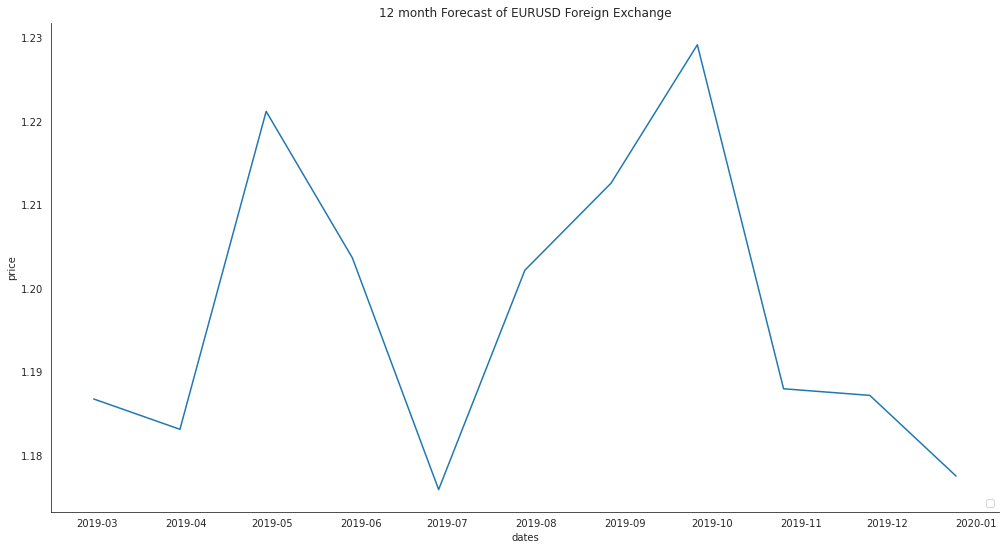

In [ ]:
# EVALUATION code - 8th block
# Arthur Ryan 20170386
# NCI AIML Course 2020-21
# Project Module - FOrexcaster Application

# for 12 month forward forecast
# MONTHLY time basis

def Monthly_12month_forecaster():

  from google.colab import drive

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

const = 0.0207
LM1 = 1.0075
LM2 = -0.0150
LM3 = 0.0826
LM4 = -0.1113
LM5 = 0.0124
LM6 = 0.1037
LM7 = -0.2417
LM8 = 0.1078
LM9 = 0.0362

vector_coefficients = []

vector_coefficients = ([LM1,LM2,LM3,LM4,LM5,LM6,LM7,LM8,LM9])   # ,LM10,LM11])

most_recent_9months = np.array([1.1866, 1.1859, 1.2227, 1.2031, 1.1731, 1.2079, 1.2140, 1.2216, 1.1928])   # ,1.1658,1.1719,1.1936])

future_price_forecasts = np.array([])

for i in range (0 , 18):
  forecast_equation = const + (most_recent_9months.T.dot(vector_coefficients))
  forecast_equation = np.array([forecast_equation])
  future_price_forecasts = np.append(future_price_forecasts, forecast_equation ,axis=0) 
  most_recent_9months = np.append(most_recent_9months, forecast_equation ,axis=0) 
  most_recent_9months = np.delete(most_recent_9months,0,0)

output = future_price_forecasts

print("\n " + str(i) + " months in to the future forecast = ")

df_future_price_forecasts = pd.DataFrame()
df_future_dates_forecasts = pd.DataFrame()

df_future_price_forecasts['price_forecast'] = future_price_forecasts
df_future_dates_forecasts['date_forecast'] = list

df_combined_date_forecast = pd.DataFrame()

df_combined_date_forecast['dates'] = df_future_dates_forecasts['date_forecast'].iloc[:]
df_combined_date_forecast['price'] = df_future_price_forecasts['price_forecast'].iloc[:]

print(df_combined_date_forecast)

# further plotting
with sns.axes_style("white"):
    plt.figure(figsize=(17,9))
    ax3 = plt.subplot(1,1,1)
    sns.lineplot(x=df_combined_date_forecast['dates'], y=df_combined_date_forecast['price'], data=df_combined_date_forecast, ax=ax3) # does work
    ax3.set_title('12 month Forecast of EURUSD Foreign Exchange')
    ax3.legend(loc='lower right')
    
sns.despine()

In [ ]:
# EVALUATION code - 9th block
# Arthur Ryan 20170386
# NCI AIML Course 2020-21
# Project Module - FOrexcaster Application

# for MONTHLY forward forecast

from google.colab import drive
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

#parameter list
# 1 - 11 lagged months of monthly data
# descriptor/naming convention is 1 month lag = 'LM1', 2 month lag = 'LM2' etc
const = 0.0207
LM1 = 1.0075
LM2 = -0.0150
LM3 = 0.0826
LM4 = -0.1113
LM5 = 0.0124
LM6 = 0.1037
LM7 = -0.2417
LM8 = 0.1078
LM9 = 0.0362

vector_coefficients = np.array([LM1,LM2,LM3,LM4,LM5,LM6,LM7,LM8,LM9])   # ,LM10,LM11])

most_recent_9months = []

most_recent_9months = [1.1866, 1.1859, 1.2227, 1.2031, 1.1731, 1.2079, 1.2140, 1.2216, 1.1928]   # ,1.1658,1.1719,1.1936])

forecast_equation = 999

forecast_equation = const + (vector_coefficients.T.dot(most_recent_9months))

for i in range (0 , 9):
  forecast_equation = const + (vector_coefficients.T.dot(most_recent_9months))
  print("\nForecast Equation = ")
  print(forecast_equation.round(4))
  most_recent_9months.insert(0, forecast_equation) # <- adds a forecast to the start of the list called 'most_recent_9months'
  most_recent_9months.pop(9)

output = most_recent_9months
print("\nForecast Equation = \n")

print("\n9 months in to the future forecast = \n")
print(output)


Forecast Equation = 
1.1868

Forecast Equation = 
1.1801

Forecast Equation = 
1.1884

Forecast Equation = 
1.1872

Forecast Equation = 
1.1787

Forecast Equation = 
1.1838

Forecast Equation = 
1.1844

Forecast Equation = 
1.1826

Forecast Equation = 
1.1846

Forecast Equation = 


9 months in to the future forecast = 

[1.1846160322845607, 1.182613215421804, 1.1844377354922586, 1.1837504921036544, 1.1787079131885319, 1.1872115224527642, 1.1884470779518754, 1.1801317602500003, 1.1867507000000002]


# **Forecaster - Daily - 9 day lag model**

In [ ]:
# EVALUATION code - 10th block
# Arthur Ryan 20170386
# NCI AIML Course 2020-21
# Project Module - FOrexcaster Application

# Forecast Generator - 180 or 365 days forward forecast
# DAILY time basis
# 9 days lagged time period

def Daily_9lag_time_forecaster():

  from google.colab import drive

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

#parameter list
# 1 - 11 lagged months of monthly data
# descriptor/naming convention is 1 month lag = 'LM1', 2 month lag = 'LM2' etc
const = 0.0207
LM1 = 1.0075
LM2 = -0.0150
LM3 = 0.0826
LM4 = -0.1113
LM5 = 0.0124
LM6 = 0.1037
LM7 = -0.2417
LM8 = 0.1078
LM9 = 0.0362

vector_coefficients = []

vector_coefficients = ([LM1,LM2,LM3,LM4,LM5,LM6,LM7,LM8,LM9])   # ,LM10,LM11])

most_recent_9months = np.array([1.1866, 1.1859, 1.2227, 1.2031, 1.1731, 1.2079, 1.2140, 1.2216, 1.1928])   # ,1.1658,1.1719,1.1936])

future_price_forecasts = np.array([])

print("\nmost_recent_9months at the start = ")
print(most_recent_9months)

for i in range (0 , 179, 1):
  forecast_equation = const + (most_recent_9months.T.dot(vector_coefficients))
  forecast_equation = np.array([forecast_equation])
  future_price_forecasts = np.append(future_price_forecasts, forecast_equation ,axis=0) 
  most_recent_9months = np.append(most_recent_9months, forecast_equation ,axis=0) 
  most_recent_9months = np.delete(most_recent_9months,0,0)

#output = most_recent_9months
output = future_price_forecasts

#print(building_forecast)
print("\n " + str(i) + " months into the future forecast = ")

print(list_future_dates)
print(len(list_future_dates))

index_dates = pd.DataFrame()

index_dates = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,
                        51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,
                        100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,
                        151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178
                        ])

#list_future_dates
df_future_dates_forecasts = pd.DataFrame()
df_future_price_forecasts = pd.DataFrame()

df_future_dates_forecasts['date_forecast'] = list_future_dates # , columns=['date_forcast'])
df_future_price_forecasts['price_forecast'] = future_price_forecasts

df_combined_date_forecast = pd.DataFrame()

df_combined_date_forecast['dates'] = df_future_dates_forecasts['date_forecast'].iloc[:] # stuck at 10
df_combined_date_forecast['price'] = df_future_price_forecasts['price_forecast'].iloc[:] # stuck at

df_combined_date_forecast.describe()

print(df_combined_date_forecast.head(30).round(4))

# BELOW from date projecting cell


most_recent_9months at the start = 
[1.1866 1.1859 1.2227 1.2031 1.1731 1.2079 1.214  1.2216 1.1928]

 178 months into the future forecast = 
[Timestamp('2019-01-30 00:00:00'), Timestamp('2019-01-31 00:00:00'), Timestamp('2019-02-01 00:00:00'), Timestamp('2019-02-02 00:00:00'), Timestamp('2019-02-03 00:00:00'), Timestamp('2019-02-04 00:00:00'), Timestamp('2019-02-05 00:00:00'), Timestamp('2019-02-06 00:00:00'), Timestamp('2019-02-07 00:00:00'), Timestamp('2019-02-08 00:00:00'), Timestamp('2019-02-09 00:00:00'), Timestamp('2019-02-10 00:00:00'), Timestamp('2019-02-11 00:00:00'), Timestamp('2019-02-12 00:00:00'), Timestamp('2019-02-13 00:00:00'), Timestamp('2019-02-14 00:00:00'), Timestamp('2019-02-15 00:00:00'), Timestamp('2019-02-16 00:00:00'), Timestamp('2019-02-17 00:00:00'), Timestamp('2019-02-18 00:00:00'), Timestamp('2019-02-19 00:00:00'), Timestamp('2019-02-20 00:00:00'), Timestamp('2019-02-21 00:00:00'), Timestamp('2019-02-22 00:00:00'), Timestamp('2019-02-23 00:00:00'), Timest

# **Forecaster - Daily - 22 day lag model**

No handles with labels found to put in legend.



Future price forecasts after the 180 day forecast = 

[1.14841269 1.1437334  1.14353751 1.14223433 1.13068624 1.13854903
 1.13617432 1.13692294 1.13666373 1.14022928 1.14027342 1.14265208
 1.1485216  1.14761241 1.15010778 1.1546355  1.14425736 1.14706463
 1.1402161  1.1397596  1.1346059  1.14705671 1.14894128 1.14425594
 1.14371144 1.14292258 1.13078594 1.13896814 1.13644708 1.13723284
 1.13702184 1.14073406 1.14052391 1.14360522 1.14936056 1.14831519
 1.15016233 1.15498481 1.144303   1.14653273 1.14091559 1.14016295
 1.13491127 1.1477126  1.14948307 1.14476771 1.14391898 1.14356872
 1.13089266 1.13935883 1.13672302 1.13752664 1.13737675 1.14131321
 1.14075644 1.14455263 1.15021861 1.14900804 1.15016351 1.15534667
 1.14433679 1.14600741 1.14159628 1.14061135 1.135216   1.14837093
 1.15003554 1.14526844 1.14415715 1.14417724 1.13099977 1.13972269
 1.13700666 1.13780195 1.13773016 1.14196586 1.14097573 1.14548793
 1.151097   1.14969064 1.15011152 1.15571947 1.14435901 1.14549119
 1.1422

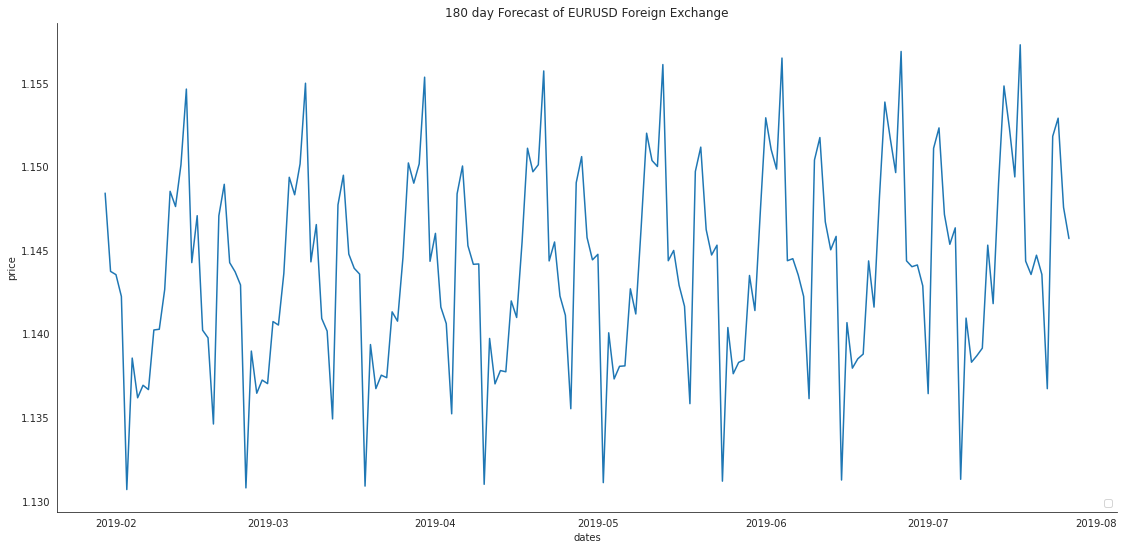

In [ ]:
# EVALUATION code - 11th block
# Arthur Ryan 20170386
# NCI AIML Course 2020-21
# Project Module - FOrexcaster Application

# WORKS Forecast Generator - 365 days forward forecast
# DAILY - 22 days lagged - time basis

def Twenty_day_lagged_forecast_generator():

  from google.colab import drive

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns

#parameter list
# 1 - 11 lagged months of monthly data
# descriptor/naming convention is 1 month lag = 'LM1', 2 month lag = 'LM2' etc
const = 0.0011
LM1 = 0.9854
LM2 = 0.0065
LM3 = -0.0078
LM4 = 0.0348
LM5 = -0.00159
LM6 = -0.0211
LM7 = 0.0136
LM8 = 0.0027
LM9 = -0.0420
LM10 = 0.01938
LM11 = 0.01719
LM12 = -0.0026
LM13 = 0.0138
LM14 = -0.0259
LM15 = 0.0278
LM16 = -0.0156
LM17 = 0.0129
LM18 = -0.0147
LM19 = 0.0080
LM20 = -0.0190
LM21 = -0.0058
LM22 = 0.0134


vector_coefficients = []

vector_coefficients = ([LM1,LM2,LM3,LM4,LM5,LM6,LM7,LM8,LM9,LM10,LM11,LM12,LM13,LM14,LM15,LM16,LM17,LM18,LM19,LM20,LM21,LM22])   # ,LM10,LM11])

most_recent_9months = np.array([1.1479, 1.1432, 1.1434, 1.1415, 1.1306, 1.1381, 1.1359, 1.1366, 1.1363, 1.1398, 1.1400, 1.1417, 1.1477, 1.1469, 1.1500,
                                1.1543, 1.1442, 1.1476, 1.1395, 1.1394, 1.1343, 1.1464])

future_price_forecasts = np.array([])

for i in range (0 , 179, 1):
  forecast_equation = const + (most_recent_9months.T.dot(vector_coefficients))
  forecast_equation = np.array([forecast_equation])
  future_price_forecasts = np.append(future_price_forecasts, forecast_equation ,axis=0) 
  most_recent_9months = np.append(most_recent_9months, forecast_equation ,axis=0) 
  most_recent_9months = np.delete(most_recent_9months,0,0)
   
print("\nFuture price forecasts after the 180 day forecast = \n")
print(future_price_forecasts)

#output = most_recent_9months
output = future_price_forecasts

#print(building_forecast)
print("\n " + str(i) + " days into the future forecast = \n")

print(list_future_dates)
print(len(list_future_dates))

index_dates = pd.DataFrame()

index_dates = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,
                        51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,
                        100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,
                        151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178
                        ])

#list_future_dates
df_future_dates_forecasts = pd.DataFrame()
df_future_price_forecasts = pd.DataFrame()

df_future_dates_forecasts['date_forecast'] = list_future_dates # , columns=['date_forcast'])
df_future_price_forecasts['price_forecast'] = future_price_forecasts

df_combined_date_forecast = pd.DataFrame()

df_combined_date_forecast['dates'] = df_future_dates_forecasts['date_forecast'].iloc[:] # stuck at 10
df_combined_date_forecast['price'] = df_future_price_forecasts['price_forecast'].iloc[:] # stuck at

print(df_combined_date_forecast.head(60).round(4))

df_combined_date_forecast.describe().round(4)

# further plotting
with sns.axes_style("white"):
    plt.figure(figsize=(19,9))
    ax3 = plt.subplot(1,1,1)
    sns.lineplot(x=df_combined_date_forecast['dates'], y=df_combined_date_forecast['price'], data=df_combined_date_forecast, ax=ax3) # does work
    ax3.set_title('180 day Forecast of EURUSD Foreign Exchange')
    ax3.legend(loc='lower right')

sns.despine()
#fig.tight_layout()
#fig.savefig(results_path / 'rnn_fx_price_regression', dpi=300);
#fig.savefig('/content/drive/MyDrive/Colab Notebooks/*Capstone Course Project/180_day_EURUSD_Forecast', dpi=300);

# **Forecaster - Daily - 22 days lag model - with Random term**

In [ ]:
# EVALUATION code - 12th block
# Arthur Ryan 20170386
# NCI AIML Course 2020-21
# Project Module - FOrexcaster Application

# - random daily fluctuation introduced - to make plot of forecast more realistic
# - Forecast Generator - 180 days forward forecast
# DAILY - 22 days lagged - time basis

def Twenty_day_lagged_forecast_generator_RANDOM_element():

  from google.colab import drive

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib #pyplot.plot
from matplotlib import pyplot
import seaborn as sns
import random as rd

#parameter list
# 1 - 11 lagged months of monthly data
# descriptor/naming convention is 1 month lag = 'LM1', 2 month lag = 'LM2' etc
const = 0.0011
LM1 = 0.9854
LM2 = 0.0065
LM3 = -0.0078
LM4 = 0.0348
LM5 = -0.00159
LM6 = -0.0211
LM7 = 0.0136
LM8 = 0.0027
LM9 = -0.0420
LM10 = 0.01938
LM11 = 0.01719
LM12 = -0.0026
LM13 = 0.0138
LM14 = -0.0259
LM15 = 0.0278
LM16 = -0.0156
LM17 = 0.0129
LM18 = -0.0147
LM19 = 0.0080
LM20 = -0.0190
LM21 = -0.0058
LM22 = 0.0134


vector_coefficients = []

vector_coefficients = ([LM1,LM2,LM3,LM4,LM5,LM6,LM7,LM8,LM9,LM10,LM11,LM12,LM13,LM14,LM15,LM16,LM17,LM18,LM19,LM20,LM21,LM22])   # ,LM10,LM11])

most_recent_9months = np.array([1.1479, 1.1432, 1.1434, 1.1415, 1.1306, 1.1381, 1.1359, 1.1366, 1.1363, 1.1398, 1.1400, 1.1417, 1.1477, 1.1469, 1.1500,
                                1.1543, 1.1442, 1.1476, 1.1395, 1.1394, 1.1343, 1.1464])

future_price_forecasts = np.array([])

for i in range (0 , 179, 1):
  forecast_equation = const + (most_recent_9months.T.dot(vector_coefficients)) + (rd.uniform(-0.0050, 0.0050))
  forecast_equation = forecast_equation * 1.0
  forecast_equation = np.array([forecast_equation])
  future_price_forecasts = np.append(future_price_forecasts, forecast_equation ,axis=0) 
  most_recent_9months = np.append(most_recent_9months, forecast_equation ,axis=0) 
  most_recent_9months = np.delete(most_recent_9months,0,0)
  if i == 44:
    print("\nmost_recent_9months after 22 iterations = ")
    print(most_recent_9months)

#output = most_recent_9months
output = future_price_forecasts

#print(building_forecast)
print("\n " + str(i) + " months into the future forecast = ")

print(list_future_dates)
print(len(list_future_dates))

index_dates = pd.DataFrame()

index_dates = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,
                        51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,
                        100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,
                        151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178
                        ])

#list_future_dates
df_future_dates_forecasts = pd.DataFrame()
df_future_price_forecasts = pd.DataFrame()

df_future_dates_forecasts['date_forecast'] = list_future_dates # , columns=['date_forcast'])
df_future_price_forecasts['price_forecast'] = future_price_forecasts

df_combined_date_forecast = pd.DataFrame()

df_combined_date_forecast['dates'] = df_future_dates_forecasts['date_forecast'].iloc[:] # stuck at 10
df_combined_date_forecast['price'] = df_future_price_forecasts['price_forecast'].iloc[:] # stuck at

print(df_combined_date_forecast.head(60).round(4))

df_combined_date_forecast.describe().round(4)

# further plotting
with sns.axes_style("white"):
    plt.figure(figsize=(17,9))
    ax3 = plt.subplot(1,1,1)
    sns.lineplot(x=df_combined_date_forecast['dates'], y=df_combined_date_forecast['price'], data=df_combined_date_forecast, ax=ax3) # does work
    ax3.set_title('180 day Forecast of EURUSD Foreign Exchange')
    ax3.legend(loc='lower right')

sns.despine()

#fig.tight_layout()
#fig.savefig(results_path / 'rnn_fx_price_regression', dpi=300);
#fig.savefig('/content/drive/MyDrive/Colab Notebooks/*Capstone Course Project/180_day_EURUSD_Forecast', dpi=300);

# **Feature Engineering**

RSI feature addition - the talib that is needed to access the RSI (relative strenght indicator) formulas did not allow access consistently

MOM feature addition - the talib that is needed to access the MOM (momentum indicator) formulas did not allow access consistently

# **Search code block**

In [ ]:
# EVALUATION code - 12th block
# Arthur Ryan 20170386
# NCI AIML Course 2020-21
# Project Module - FOrexcaster Application

# APP code cell to launch Application -> in EVALUATION code cells
# Arthur Ryan 20170386
# NCI AIML Course 2020-21
# Project Module - FOrexcaster Application


# *** Search of Datetime value from user
# for checking against Forecast table of date and prices

def Search_data_and_price(user_target_date='2019-04-01', user_target_price=1.1301): # NB - Forecast starts from 2019-03-01 so only dates in that period will produce date search results

  from google.colab import drive
  from datetime import datetime
  import time
  import numpy as np
  import pandas as pd

  user_target_date = pd.to_datetime(user_target_date) # convert sent string from calling Menu function to a datetime datatype compatible to the datatype in the lookup table ie the forecast table
  
  #drive.mount('/content/drive/') # commented out for cleaner screen prints in App running

  fx_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/*Capstone Course Project/EUR_USD_Daily_180_Day_Forecast.csv')

  fx_data['date'] = pd.to_datetime(fx_data['dates'])

  row_length = len(fx_data)

  # search for Target Date
  for r in range(0,  row_length):
    if fx_data['date'].iloc[r] == user_target_date: # '2019-04-01':   # user_target_date: # '2018-07-24 00:00:00':
      print("\n*** Search for Target Date Results = ")
      print("\nDate = ",fx_data['date'].iloc[r])
      print("Price = ", round(fx_data['price'].iloc[r],4))
      print("\n->> (if no date(s) appear(s) it means the date you specified is not in the price range of the forecast)")  

  precision_percent = 0.0010

  # search for Target Price

  print("\n*** Search for Target Price Results = ")
  print("\nFor the Target price of", user_target_price," within +/- ",precision_percent * 100,"% this is forecast to appear\non the following dates at 00:00 hours/midnight")

  for r in range(0,  row_length):
    if fx_data['price'].iloc[r] >= user_target_price * (1.00 - precision_percent) and fx_data['price'].iloc[r] <= user_target_price * (1.00 + precision_percent):   # '2018-07-24 00:00:00':
      print("\nDate = ",fx_data['dates'].iloc[r])
      print("Price = ", round(fx_data['price'].iloc[r],4))
      print("\n->> (if no price(s) appear(s) it means the price you specified is not in the price range of the forecast)")  

In [ ]:
# EVALUATION code - 13th block
# Arthur Ryan 20170386
# NCI AIML Course 2020-21
# Project Module - FOrexcaster Application

# - MENU system for Application Forexcaster -> in EVALUATION code cells
# with For Loop

def Menu_initial():
  from datetime import date
  from sys import exit
  import pandas as pd
  # definitions
  # initialisations
  option2_date = 0000-00-00
  option3_price = 0.0
  menu_completion = 0
  
def menu0_ccy():
  print("\n")
  print("*"*80)
  print("\n\t\t\tForexcaster\n")
  print("\n")
  print("\t\tMenu 1 - Login Identification\n")
  print("Please enter your user name:\n")
  print("Please enter your password:\n")
  print("\n")
  print("Press 0 to Exit\n")
  #menu0_ccy()
  option0a_ccy = str(input("What is your User Name\n"))
  option0b_ccy = str(input("What is your Password\n"))

def menu1_ccy():
  print("\n")
  print("*"*80)
  print("\n\t\t\tForexcaster\n")
  print("\n")
  print("\t\tMenu 2 - Target Currency\n")
  print("Select your target currency - please see options listed below:\n")
  print("\tPress 1 for EURUSD")
  print("\tPress 2 for AUDUSD")
  print("\tPress 3 for USDJPY")
  print("\n")
  print("Press 0 to Exit\n")
 
def menu2_date():
  print("\n")
  print("*"*80)
  print("\n\t\t\tForexcaster\n")
  print("\n")
  print("\t\tMenu 3 - Target Date\n")
  print("Enter your target date in format YYYY-MM-DD")
  print("NB -> (Forecast period starts from 2019-03-01 and ends 2019-08-26)")
  print("\n")
  print("Press 0 to Exit\n")
  # option2_date = input("What is your Target Date?, in format YYYY-MM-DD\n")
      
def menu3_price():
  print("\n")
  print("*"*80)
  print("\n\t\t\tForexcaster\n")
  print("\n")
  print("\t\tMenu 4 - Target Price\n")
  print("Enter your target price in format N.NNNN for EURUSD or AUDUSD ; and NNN.NN for USDJPY")
  print("NB -> (Forecast price starts from 1.1301)")
  print("\n")
  print("Press 0 to Exit")
  # option3_price = float(input("What is your Target Price?, in format N.NNNN for EURUSD or AUDUSD ; and NNN.NN for USDJPY\n"))
  
def menu_date_validation(option2_date):
  while option2_date != 0:
    if option2_date == 0:
      menu1_ccy() # add in full system exit
    if option2_date.isnumeric == False:
      print("Invalid option")
      option2_date = input("What is your Target Date?, in format YYYY-MM-DD\n")
      # print()
   
def menu_price_validation(option3_price):
  while option3_price != 0:
    print("Your Target Price is " + str(option3_price) + " in format N.NNNN for EURUSD or AUDUSD ; and NNN.NN for USDJPY\n")
    if option3_price == 0:
      menu1_ccy()  # add in full system exit
    if option3_price < 0:
      print("Invalid option")
      option3_price = float(input("What is your Target Price?, in format N.NNNN for EURUSD or AUDUSD ; and NNN.NN for USDJPY\n"))


# Menu code - code for Menu system

def Menu_launch():
  from datetime import datetime
  print()
  import re
  string_check= re.compile('[@_!#$%^&*()<>?/\|}{~:]') # nb '-' hyphen as used in required date format YYYY-MM-DD so not blocked further down at menu 2
  menu_completion = 0
  while menu_completion != 1:
    for i in range (0,1,1):
      print("\n")
      print("*"*80)
      print("\n\t\t\tForexcaster\n")
      print("\n")
      print("\t\tMenu 1 - Login Identification\n")
      print("Please enter your user name:\n")
      print("Please enter your password:\n")
      print("\n")
      print("Press 0 to Exit\n")
      option0a_ccy = str(input("What is your User Name\n"))
      option0b_ccy = str(input("What is your Password\n"))
      if (option0a_ccy != 0 or option0a_ccy != 999 and option0b_ccy != 0 or option0b_ccy != 999 
          and type(option0a_ccy) != int and type(option0a_ccy) != float 
          and type(option0b_ccy) != int and type(option0b_ccy) != float 
          and string_check.search(option0a_ccy) == None and string_check.search(option0b_ccy) == None 
          and len(option0a_ccy) <= 10 and len(option0b_ccy) <= 10 
          and len(option0a_ccy) != 0 and len(option0b_ccy) != 0): 
        if option0a_ccy == 'test' and option0b_ccy == 'forex'and menu_completion != 1: # and option1_ccy != 999:
          print("\n")
          print("*"*80)
          print("\t\t\tWelcome to Forexcaster")
          print("*"*80)
          print("\n")
          menu1_ccy()
          option1_ccy = input("What is your Target Currency (using the number based menu listed above)? ")
          int(option1_ccy)
          if (option1_ccy != 0 and menu_completion != 1 #  and option1_ccy > 0 and option1_ccy <=3:
            and type(option1_ccy) != str
            and type(option1_ccy) == int or type(option1_ccy) == float
            and len(option1_ccy) != 0 or len(option1_ccy) <= 2
            and string_check.search(option1_ccy) == None):
            option_ccy_text = "EURUSD"
            menu2_date()
            option2_date = input("What is your Target Date?, in format YYYY-MM-DD\n")
          elif option1_ccy == 0:
            print("Programme exited")
            exit()            
          else:  # ->> add in warning message
            menu_completion = 1
            print("\n")
            print("*"*80)
            print("\n\t\t\tForexcaster Message - Menu 2 - Target Currency\n")
            print("\n\t\Message: You entered an illegal character in your Target Currency entry\n")
            print("\n\t\Message: You need to enter ONLY numbers\n")
            print("\n\t\Message: No Special Characters\n")
            print("\n\t\Message: The total entry of characters must be of length 1\n")
            print("*"*80)
            print("Programme exited")
            print("Retry in a few moments")
            exit()
          if (option2_date != 0 and menu_completion != 1             
              and type(option2_date) == datetime
              and type(option2_date) != int or type(option2_date) != float 
              and string_check.search(option2_date) == None # '-' used in YYY-MM-DD not included in special character list
              and len(option2_date) == 10 # for date format 'YYYY-MM-DD'
              and len(option2_date) != 0): # for date not being blank
              menu3_price()
              option3_price = float(input("What is your Target Price?, in format N.NNNN for EURUSD or AUDUSD ; and NNN.NN for USDJPY\n"))
          elif option2_date == 0: # ->> add in warning message
            print("Programme exited")
            exit()     
          else:  # ->> add in warning message
            menu_completion = 1
            print("\n")
            print("*"*80)
            print("\n\t\t\tForexcaster Message - Menu 3 - Target Date\n")
            print("\n\t\Message: You entered an illegal character in your Target Date entry\n")
            print("\n\t\Message: You need to enter ONLY numeric characters\n")
            print("\n\t\Message: No Special Characters\n")
            print("\n\t\Message: The total entry of characters must be of length 10\n")
            print("*"*80)
            print("Programme exited")
            print("Retry in a few moments")
            exit() 
            option_ccy_text = "EURUSD"
          if (option3_price != 0 and menu_completion != 1             
            and type(option3_price) != datetime
            and type(option3_price) == float):
            option1_ccy == 999 # SHOUD THIS BE AT MENU 4 NOW
            menu_completion = 1
          elif option3_price == 0:  # ->> add in warning message
            menu_completion = 1
            print("Programme exited")
            exit() 
          # links back to While clause/line
          else:  # ->> add in warning message
            menu_completion = 1
            print("\n")
            print("*"*80)
            print("\n\t\t\tForexcaster Message - Menu 4 - Target Price\n")
            print("\n\t\Message: You entered an illegal character in your Target Currency entry\n")
            print("\n\t\Message: You need to enter ONLY numeric characters\n")
            print("\n\t\Message: No Special Characters\n")
            print("\n\t\Message: The total entry of characters must be of length 6\n")
            print("*"*80)
            print("Programme exited")
            print("Retry in a few moments")
            exit() 
                 
  print("\n")
  print("*"*80)
  print("\n\nSending 'user_target_date' and 'user_target_price' :")
  
  print("\n*** Forecaster is generating your forecasts now: ***\nFor Target Currency of ->" + option_ccy_text + "\nFor Target Date of " + str(option2_date) + "\nand for Target Price of " + str(option3_price) + ".\n\n...Standby\n")
  
  #Search_data_and_price(option2_date, option3_price)
  #Search_data_and_price(user_target_date=option2_date, user_target_price=option3_price)

#Menu_launch()

**Attempted Feature Engineering with RSI**

In [ ]:
# WORKS - part 1 - RSI feature addition - Feature Engineering adding another feature RSI

#The way it worked for me from a container and running jupyter notebook is the following:
import os,sys
#Clean everything if previosuly. !rm -rf ta-lib*
#Download the package
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
#Unpack the tar.
!tar xvf ta-lib-0.4.0-src.tar.gz
!pwd
!ls -l
#Move to the unpacked and run the files.
!cd /home/$USER/work/ta-lib/ && ./configure --prefix=/usr
!cd /home/$USER/work/ta-lib/ && make
!cd /home/$USER/work/ta-lib/ && sudo make install
#Install now the package
!pip install --user Ta-Lib
#Import and tadaaa!
#import talib # worked on 6/8/2021 but does not work on 7/8/2021
#import Ta-Lib # does not work on 7/8/2021
#import ta-lib # does not work on 7/8/2021

# from talib import RSI # does not work on 7/8/2021

rsi = RSI(ccylagged['closebid'],timeperiod=14)

print(rsi)

# ccylagged = pd.DataFrame({ccylagged, 'RSI': rsi})
df_rsi = pd.DataFrame({'RSI': rsi})

print(df_rsi)

# ccylagged = ccylagged.append(df_rsi, ignore_index = True)

ccylagged['RSI'] = df_rsi

print()
print(ccylagged.head(10))
print()
print(ccylagged.tail(10))

# ccylagged.info()

print(ccylagged.info())

ccylagged.isna().sum()

**Attempted Feature Engineering with MOM**

In [ ]:
# Works - part 2 - feature addition - MOM
from talib import MOM

#rsi = RSI(ccylagged['closebid'],timeperiod=14)
#real = MOM(close, timeperiod=10)
real = MOM(ccylagged['closebid'], timeperiod=10)

# ccylagged = pd.DataFrame({ccylagged, 'RSI': rsi})
#df_rsi = pd.DataFrame({'RSI': rsi})
df_mom = pd.DataFrame({'MoM': real})

#print(df_mom[:100])
#print(df_mom[100:])
#print(df_mom[123008:123109])
#ccylagged = ccylagged.append(df_mom, ignore_index = True)

ccylagged['MOM'] = df_mom

# ccylagged.info()

#new_data = data.dropna(axis = 0, how ='any') 
#ccylagged = ccylagged.dropna()
#ccylagged.info()
#print("NaN number in column ABC = :")
#ccylagged['MoM'].isna().sum()
#ccylagged.isna().sum()
print()
print(ccylagged.head(10))
print()
print(ccylagged.tail(20))
# print(ccylagged.head(5)

print(ccylagged.info())

ccylagged.isna().sum()

# **do NOT run - Ridge Regression (missing a library - listed MultiVariableCV(Cross Validation) not found where referenced)**

In [ ]:
# *** do NOT run *** Ridge Regression
# EXP - TBC = NO because library from scikitlearn has been withdrawn ie no MultipleTimeSeriesCV- Ridge Regression with CV (cross validation)
# daily time frame - 180 day forecast

%matplotlib inline

from time import time
from pathlib import Path
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
#from sklearn.model_selection import MultipleTimeSeriesCV
!pip import MultipleTimeSeriesCV
# from sklearn.crossvalidate import MultipleTimeSeriesCV
# from utils import MultipleTimeSeriesCV
#from sklearn.model_selection import multipletimeseriescv
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
#from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold


import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


from google.colab import drive
drive.mount('/content/drive/')

#ccyorgnl = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/*Capstone Course Project/FXCM_H1_EXP.csv')
#ccyorgnl = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/*Capstone Course Project/FXCM_H1_EURUSD.csv')
ccyorgnl = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/*Capstone Course Project/EUR_USD_Monthly_Historical_Data.csv')


X = ccyorgnl

#Define cross-validation parameters
ridge_alphas = np.logspace(-4, 4, 9)
ridge_alphas = sorted(list(ridge_alphas) + list(ridge_alphas * 5))

#Define cross-validation parameters
#n_splits = int(3 * YEAR/test_period_length)
test_period_length = 10
n_splits = int(3 * 1/test_period_length)
train_period_length = 63
#test_period_length = 10
lookahead = 1

#cv = MultipleTimeSeriesCV(n_splits=n_splits,
#                          test_period_length=test_period_length,
#                          lookahead=lookahead,
#                          train_period_length=train_period_length)

cv = cross_validate(n_splits=n_splits,
                          test_period_length=test_period_length,
                          lookahead=lookahead,
                          train_period_length=train_period_length)

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)


#Run cross-validation
# target = f'target_{lookahead}d'
target = X['closebid']


X = X.drop([c for c in X.columns if 'year' in c], axis=1)

#Run cross-validation
#%%time
ridge_coeffs, ridge_scores, ridge_predictions = {}, [], []

for alpha in ridge_alphas:
    print(alpha, end=' ', flush=True)
    start = time()
    model = Ridge(alpha=alpha,
                  fit_intercept=False,
                  random_state=42)

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)])

    coeffs = []
    for i, (train_idx, test_idx) in enumerate(cv.split(X), 1):
        X_train, y_train, = X.iloc[train_idx], y[target].iloc[train_idx]
        X_test, y_test = X.iloc[test_idx], y[target].iloc[test_idx]

        pipe.fit(X=X_train, y=y_train)
        y_pred = pipe.predict(X_test)

        preds = y_test.to_frame('actuals').assign(predicted=y_pred)
        preds_by_day = preds.groupby(level='date')
        scores = pd.concat([preds_by_day.apply(lambda x: spearmanr(x.predicted,
                                                                   x.actuals)[0] * 100)
                            .to_frame('ic'),
                            preds_by_day.apply(lambda x: np.sqrt(mean_squared_error(y_pred=x.predicted,
                                                                                    y_true=x.actuals)))
                            .to_frame('rmse')], axis=1)

        ridge_scores.append(scores.assign(alpha=alpha))
        ridge_predictions.append(preds.assign(alpha=alpha))

        coeffs.append(pipe.named_steps['model'].coef_)
    ridge_coeffs[alpha] = np.mean(coeffs, axis=0)

print('\n')


#Persist results
ridge_scores = pd.concat(ridge_scores)
ridge_scores.to_hdf('data.h5', 'ridge/scores')

ridge_coeffs = pd.DataFrame(ridge_coeffs, index=X.columns).T
ridge_coeffs.to_hdf('data.h5', 'ridge/coeffs')

ridge_predictions = pd.concat(ridge_predictions)
ridge_predictions.to_hdf('data.h5', 'ridge/predictions')

ridge_scores = pd.read_hdf('data.h5', 'ridge/scores')
ridge_coeffs = pd.read_hdf('data.h5', 'ridge/coeffs')
ridge_predictions = pd.read_hdf('data.h5', 'ridge/predictions')


#Evaluate Ridge Results
ridge_r, ridge_p = spearmanr(ridge_predictions.actuals, ridge_predictions.predicted)
print(f'Information Coefficient (overall): {ridge_r:.3%} (p-value: {ridge_p:.4%})')

ridge_scores.groupby('alpha').ic.describe()

#Evaluate Ridge Results
fig, axes = plt.subplots(ncols=2, sharex=True, figsize=(15, 5))

scores_by_alpha = ridge_scores.groupby('alpha').ic.agg(['mean', 'median'])
best_alpha_mean = scores_by_alpha['mean'].idxmax()
best_alpha_median = scores_by_alpha['median'].idxmax()

ax = sns.lineplot(x='alpha',
                  y='ic',
                  data=ridge_scores,
                  estimator=np.mean,
                  label='Mean',
                  ax=axes[0])

scores_by_alpha['median'].plot(logx=True,
                               ax=axes[0],
                               label='Median')

axes[0].axvline(best_alpha_mean,
                ls='--',
                c='k',
                lw=1,
                label='Max. Mean')
axes[0].axvline(best_alpha_median,
                ls='-.',
                c='k',
                lw=1,
                label='Max. Median')
axes[0].legend()
axes[0].set_xscale('log')
axes[0].set_xlabel('Alpha')
axes[0].set_ylabel('Information Coefficient')
axes[0].set_title('Cross Validation Performance')

ridge_coeffs.plot(logx=True,
                  legend=False,
                  ax=axes[1],
                  title='Ridge Coefficient Path')

axes[1].axvline(best_alpha_mean,
                ls='--',
                c='k',
                lw=1,
                label='Max. Mean')
axes[1].axvline(best_alpha_median,
                ls='-.',
                c='k',
                lw=1,
                label='Max. Median')
axes[1].set_xlabel('Alpha')
axes[1].set_ylabel('Coefficient Value')

fig.suptitle('Ridge Results', fontsize=14)
sns.despine()
fig.tight_layout()
fig.subplots_adjust(top=.9)


#Evaluate Ridge Results
best_alpha = ridge_scores.groupby('alpha').ic.mean().idxmax()
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
plot_ic_distribution(ridge_scores[ridge_scores.alpha == best_alpha],
                     ax=axes[0])
axes[0].set_title('Daily Information Coefficients')
top_coeffs = ridge_coeffs.loc[best_alpha].abs().sort_values().head(10).index
top_coeffs.tolist()
ridge_coeffs.loc[best_alpha, top_coeffs].sort_values().plot.barh(ax=axes[1],
                                                                 title='Top 10 Coefficients')
sns.despine()
fig.tight_layout()

#Evaluate Ridge Regression
plot_rolling_ic(ridge_scores[ridge_scores.alpha==best_alpha])

ERROR: unknown command "import"


ModuleNotFoundError: ignored